# Regresión Lineal

## Introducción

La Regresión lineal, es un método estadístico-matemático que permite hallar una función lineal, entre al menos dos variables cuantitativas. A traves de este método se busca la mejor representación de una nube de observaciones, mediciones, o registros a traves de una línea recta si pensamos en 2D, un plano en 3D, ó un hiperplano si continuamos subiendo en dimensiones. El objetivo primordial del método es obtener la mejor representación de la nube y adquirir la capacidad de estimar e inferir los parámetros de las distribuciones que generaron estas observaciones, mediciones o registros.

![LRUrl](https://www.jmp.com/en_sg/statistics-knowledge-portal/what-is-regression/_jcr_content/par/styledcontainer_2069/par/lightbox_55ba_copy/lightboxImage.img.gif/1595274185575.gif "LR")

https://www.jmp.com/en_sg/statistics-knowledge-portal/what-is-regression/_jcr_content/par/styledcontainer_2069/par/lightbox_55ba_copy/lightboxImage.img.gif/1595274185575.gif "LR"

## Breve Historia

Como la gran mayoría de los métodos actuales, la regresión lineal tuvo origen al inicio del siglo XIX, época en la que personas de ciencia de datos,como Johan Carl Friedrich Gauss, Matemático y Físico Alemán, y Adrien-Marie Legendre, Matemático Francés, se dieron a la tarea de crear las bases teóricas de los módelos lineales. Ellos describen entonces lo que es el método de mínimos cuadrados, que posteriormente en el siglo XX se afianza con la presentación de la métodologia basada en verosimilitud de R.A Fisher. A la fecha estas bases teóricas siguen intactas.  

## Algoritmo de la Regressión Lineal

Iniciamos por asumir que tenemos N observaciones, identificadas por $Y_i$, donde $i=1,2,.....,N$, si los datos siguen un modelo lineal, entonces la estructura sobre la medias puede describirse en términos del valor esperado como:

$$ E[Y_i]=\sum_{j=1}^{p} \theta_j X_{ij}; \quad i=1,2,......,N  $$

en donde $X_{ij}$ indican la j-ésima variable de entrada asociada con la i-ésima respuesta, y $\theta_{j}$ es un parámetro desconocido con $j=1,2,.....,P$.

Para dar mayor generalidad esta misma formulación se puede presentar en notación matricial, donde asumimos $Y^{t}=(Y_1, Y_2,....,Y_N)$, siendo $Y$ un vector aleatorio. Bajo esta notación, nuestra formula se reescribe de la siguiente forma:

$$ E(Y)=\sum_{j=1}^{P} \theta_j X_j=X \theta$$

donde $X_j^t=(X_{1j},X_{2j},....,X_{Nj},\quad j=1,2,....,p$, que se puede simplificar a

$$E(Y)=X\theta$$

siendo $ X=(X_1,X_2,.....,X_p)$ una matriz $NxP$, conocida como matriz de diseño o de variables de entrada.

El segundo momento de los elementos de $Y$, la matriz de covarianzas de $Y$, denotada por $V=Var(Y)$, es una matriz simétrica  cuyos elementos en la diagonal principal $v_{ij}$, hacen referencia a la covarianza entre pares de variables.

Por definición la matriz $V$ se describe como:

$$Var(Y)=V=E[(Y-E(Y))(Y-E(Y))^t]$$

que puede generalizarse como 

$$V=\sum \phi_t V_t$$

donde $V_t$:Matriz simétrica concida con elementos $v_{ijk}$, la cual se conoce como matriz de componentes de varianza, y $\phi_t$: Los componentes de varianza asociados.

Asi en un modelo $Y_{ij}=\mu +\alpha+e_{ij}$ con $i=1,.....,\alpha$; $j=1,....,n$, diremos que $V=\sigma_{\epsilon}^{2}(I_a \otimes I_n)+\sigma_{\alpha}^2(I_{\alpha} \otimes J_n)$, donde se supone que $\alpha_i \thicksim (0,\sigma_{\alpha}^2)$ y $e_{ij} \thicksim (0,\sigma_{e}^2)$ 

"Modelo Lineales, Notas de Clase, Luis A. López y Luis F. Rincón 1999. Universidad Nacional de Colombia" 

## Caso de uso : Vinos

### Paso 1: Importar paquetes de trabajo

In [109]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

### Paso 2: Importar. visualizar y describir los datos de trabajo

In [127]:
dfVino=pd.read_csv('~/Desktop/Diplomado UNAL/winequality-red.csv', delimiter=";", low_memory=False, index_col=False,keep_date_col=True)
dfVino.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [128]:
dfVino.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


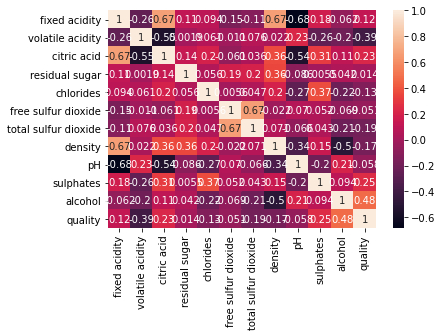

In [129]:
corrMatrix=dfVino.corr()
sb.heatmap(corrMatrix, annot=True)
plt.show()

In [130]:
dfVino.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


### Paso 3: Ajustar el modelo de regresión lineal por mínimos cuadrados con todas las variables explicativas

In [131]:
from pandas import DataFrame
import statsmodels.api as sm

Y=dfVino['quality']
X=dfVino[['fixed acidity', 'volatile acidity','citric acid','residual sugar', 'chlorides','free sulfur dioxide', 'total sulfur dioxide','density','pH','sulphates','alcohol']]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Tue, 23 Mar 2021   Prob (F-statistic):          1.79e-145
Time:                        18:50:22   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652 

### Paso 4: Revisar notas de multicolinearlidad entre las variables explicativas

In [132]:
Y=dfVino['quality']
X=dfVino[['fixed acidity','citric acid','residual sugar', 'density']]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     81.49
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           5.42e-63
Time:                        18:55:56   Log-Likelihood:                -1777.9
No. Observations:                1599   AIC:                             3566.
Df Residuals:                    1594   BIC:                             3593.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            219.8584     14.312     15.

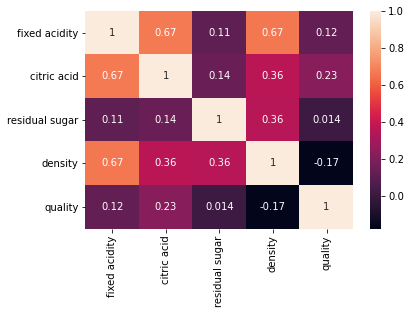

In [133]:
MC=dfVino[['fixed acidity','citric acid','residual sugar', 'density','quality']]
corrMatrix=MC.corr()
sb.heatmap(corrMatrix, annot=True)
plt.show()

### Paso 5: Ajustar nuevo modelo eliminado variables que generan multicolinearidad 

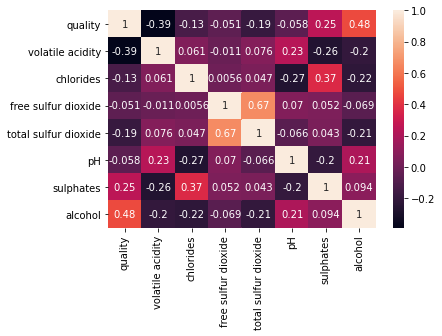

In [135]:
dfVino2=dfVino[['quality', 'volatile acidity', 'chlorides','free sulfur dioxide', 'total sulfur dioxide','pH','sulphates','alcohol']]
corrMatrix=dfVino2.corr()
sb.heatmap(corrMatrix, annot=True)
plt.show()

In [155]:
Y=dfVino2['quality']
X=dfVino2[['volatile acidity','chlorides','free sulfur dioxide', 'total sulfur dioxide','pH','sulphates','alcohol']]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     127.6
Date:                Tue, 23 Mar 2021   Prob (F-statistic):          5.32e-149
Time:                        19:15:15   Log-Likelihood:                -1570.5
No. Observations:                1599   AIC:                             3157.
Df Residuals:                    1591   BIC:                             3200.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.4301 

### Paso 6: Revisando valores atípicos

<AxesSubplot:xlabel='volatile acidity'>

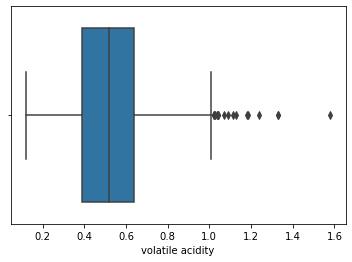

In [141]:
sb.boxplot(x=dfVino2['volatile acidity'])

<AxesSubplot:xlabel='chlorides'>

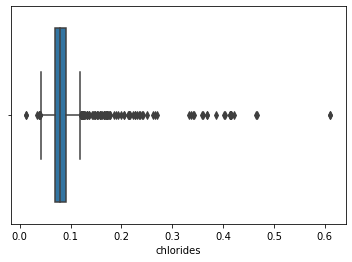

In [146]:
sb.boxplot(x=dfVino2['chlorides'])

<AxesSubplot:xlabel='free sulfur dioxide'>

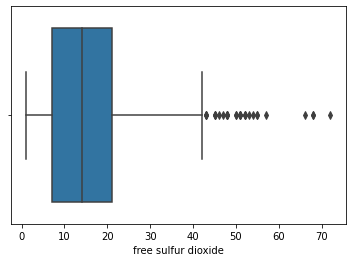

In [143]:
sb.boxplot(x=dfVino2['free sulfur dioxide'])

<AxesSubplot:xlabel='total sulfur dioxide'>

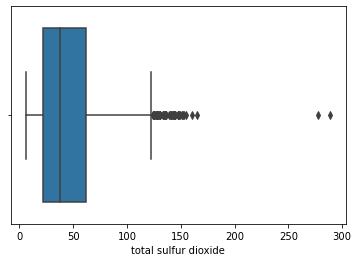

In [147]:
sb.boxplot(x=dfVino2['total sulfur dioxide'])

<AxesSubplot:xlabel='pH'>

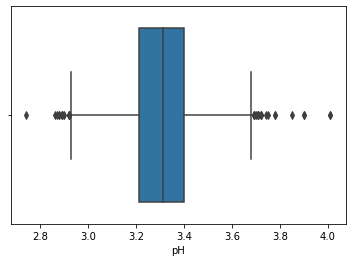

In [148]:
sb.boxplot(x=dfVino2['pH'])

<AxesSubplot:xlabel='sulphates'>

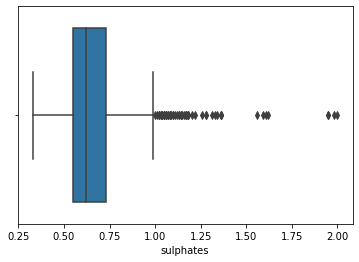

In [149]:
sb.boxplot(x=dfVino2['sulphates'])

<AxesSubplot:xlabel='alcohol'>

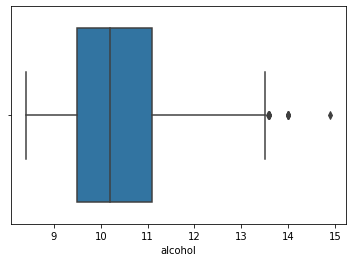

In [150]:
sb.boxplot(x=dfVino2['alcohol'])

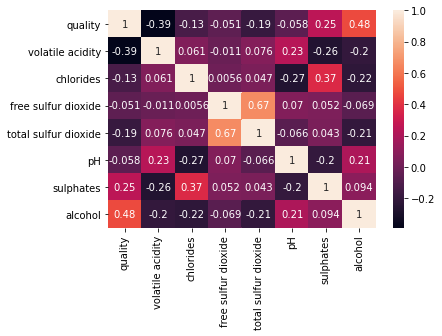

In [156]:
dfVino3=dfVino[['quality','volatile acidity', 'chlorides','free sulfur dioxide', 'total sulfur dioxide','pH','sulphates','alcohol']]
corrMatrix=dfVino3.corr()
sb.heatmap(corrMatrix, annot=True)
plt.show()

In [157]:
Y=dfVino2['quality']
X=dfVino2[['volatile acidity', 'chlorides','free sulfur dioxide', 'total sulfur dioxide','sulphates','alcohol']]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     144.6
Date:                Tue, 23 Mar 2021   Prob (F-statistic):          1.77e-146
Time:                        19:18:45   Log-Likelihood:                -1578.9
No. Observations:                1599   AIC:                             3172.
Df Residuals:                    1592   BIC:                             3209.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.0003 

## Conclusiones

Decidi quedarme con el modelo de seis variables explicativas, con este modelo no perdemos poder de explicación referente a lo que teniamos inicialmente que no es mucho, pero todos los parámetros son significativos. Es importante mencionar que persisten problemas que atribuyo a valores atípicos porque la correlación entre las variables explicativas es baja, por lo que la multicolineariedad ya deberia estar controlada. 